In [1]:
import pandas as pd

df = pd.read_csv("retail_sales.csv")
df.head()


,Month,Sales
0,2021-01,12000
1,2021-02,13000
2,2021-03,12500
3,2021-04,14000
4,2021-05,15000


In [2]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

df.head()


,Sales
Month,
2021-01-01,12000
2021-02-01,13000
2021-03-01,12500
2021-04-01,14000
2021-05-01,15000


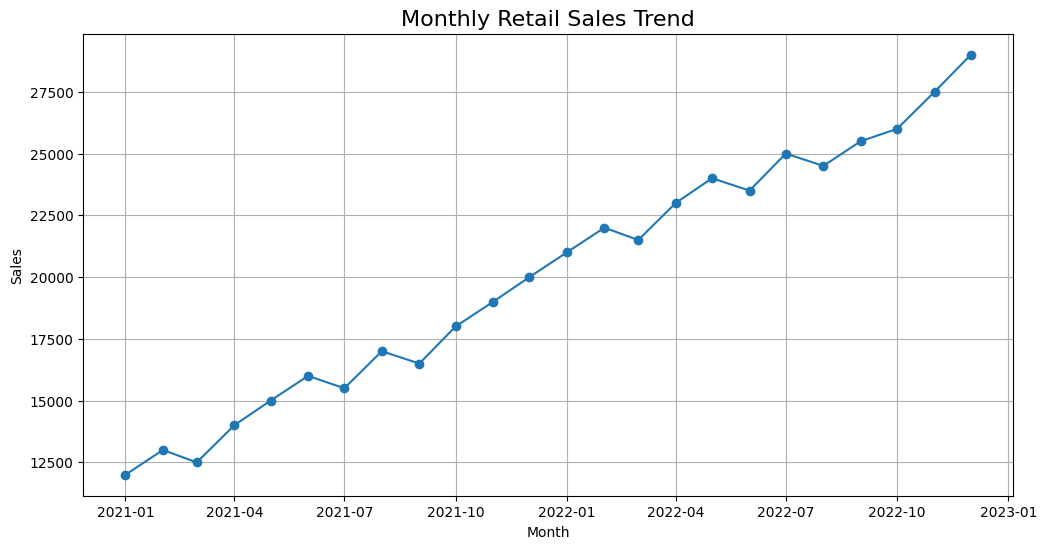

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Sales'], marker='o')
plt.title("Monthly Retail Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model (2,1,2) – works well for this dataset
model = ARIMA(df['Sales'], order=(2,1,2))
model_fit = model.fit()

model_fit.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -185.377
Date:                Thu, 18 Dec 2025   AIC                            380.754
Time:                        07:02:57   BIC                            386.431
Sample:                    01-01-2021   HQIC                           382.182
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2505      0.572      2.184      0.029       0.128       2.373
ar.L2         -0.2505      0.573     -0.438      0.662      -1.373       0.872
ma.L1         -1.4736      0.925     -1.593      0.111      -3.287       0.340
ma.L2          0.4765      0.674      0.707      0.479      -0.844       1.797
sigma2      5.621e+05   8.82e-07   6.38e+11      0.000    5.62e+05    5.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.91   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.05   Prob(JB):                         0.25
Heteroskedasticity (H):               0.81   Skew:                            -0.70
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+30. Standard errors may be unstable.
"""

In [5]:
forecast = model_fit.forecast(steps=3)
forecast


,predicted_mean
2023-01-01,29526.444405
2023-02-01,30225.388991
2023-03-01,30967.526510


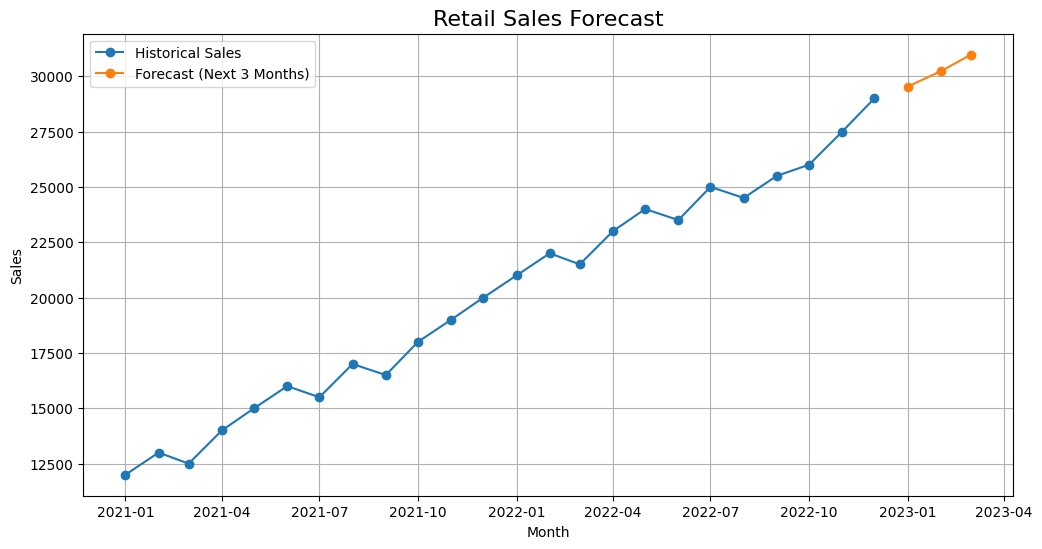

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label="Historical Sales", marker='o')
plt.plot(forecast, label="Forecast (Next 3 Months)", marker='o')
plt.title("Retail Sales Forecast", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
forecast_df = forecast.to_frame(name="Forecasted_Sales")
forecast_df.to_csv("sales_forecast_output.csv")

forecast_df


,Forecasted_Sales
2023-01-01,29526.444405
2023-02-01,30225.388991
2023-03-01,30967.526510
